In [ ]:
import sys
sys.path.append("..")
import os
import torch
import matplotlib.pyplot as plt

In [ ]:
import utils.dataset as mydataset
import models.models as mymodel

In [ ]:
arg_batchsize = 4
arg_pretrainedModel_G_B = "../models/model_G/final_model_G_B.pt"
arg_workers = 8
arg_dataset = "../data/"
arg_split = "train"
arg_outputPath = "../data/savings/output/"
arg_layer_depth = 24

In [ ]:
random_photo_dataset = mydataset.Random_Photo_Dataset("../data/", 256, arg_batchsize)

model = mymodel.Generator(3, arg_layer_depth)
model_param = torch.load(arg_pretrainedModel_G_B)
model.load_state_dict(model_param())
print("Use model from " + arg_pretrainedModel_G_B)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.eval()
model.to(device)

if not os.path.exists(arg_outputPath):
    os.makedirs(arg_outputPath)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


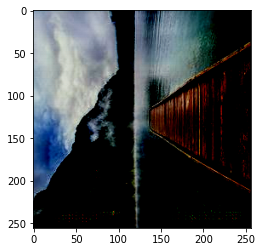

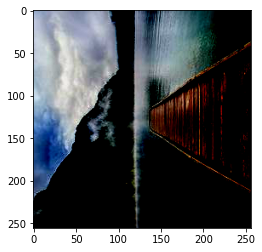

In [48]:
with torch.no_grad():
    photo_batch = random_photo_dataset.getRandomBatch().to(device)
    monet = model(photo_batch)
        
gtmap_img = monet[0].cpu().numpy().transpose()

gt_img = photo_batch[0].cpu().numpy().transpose()

plt.figure()
plt.imshow(gtmap_img)

plt.figure()
plt.imshow(gt_img)